In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In the cell above we load required packges. Belwo, we read the data and configure the test vector. Note, that the training and test set are provided separately.

In [2]:
train_df = pd.read_csv("https://drive.google.com/uc?id=1-q6hK_8lHoh5YBqUriWDcU-p2ET-Dbb8")
test_df = pd.read_csv("https://drive.google.com/uc?id=1PhltOKxh0zwWem64kEnJeL9RykRmsY4_")

test_df['Survived'] = np.array([0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0])
# describes the dataframe
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here, we have a dataset about the data of survivors from the famous ship Titanic. The response variable is $1$ if the passenger survived and $0$ if not.

column | description
-------------------|------------------
survival | Survival	0 = No, 1 = Yes
pclass | Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex | Gender
Age | Age in years
sibsp | # of siblings / spouses aboard the Titanic
parch | # of parents / children aboard the Titanic
ticket | Ticket number
fare | Passenger fare
cabin | Cabin number
embarked | Port of Embarkation

The data is already divided into training and test set.
Below, we have an example on how to extract the response and feature matrix from train data. Your turn is to extract `y_test` and `X_test` from the `test_df`.

In [3]:
X_train = train_df.iloc[:, train_df.columns != 'Survived']
y_train = train_df["Survived"]

# extract the variables below similarly to the example above
X_test = test_df.iloc[:, test_df.columns != 'Survived']
y_test = test_df["Survived"]
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


Let us check the balance of the response variable in the training dataset.

1. Is the data balanced? I.e., does the classes have approximately equal count of elements?
2. What kind of methods and techniques would you use to handle a highly imbalanced dataset?
Print your answers below.

In [4]:
n_row_train = train_df.shape[0]
print("Training data:")
print(f'\tProportion of survived: {sum(train_df["Survived"])/n_row_train:.4f}')
print(f'\tProportion of those who did not survive: {sum(1 - train_df["Survived"])/n_row_train:.4f}')

# compare the balance with the test dataset similarly to the above
n_row_test = test_df.shape[0]
print("Test data:")
print(f'\tProportion of survived: {sum(test_df["Survived"])/n_row_test:.4f}')
# add proportion of those who did not survive
print(f'\tProportion of those who did not survive: {sum(1 - test_df["Survived"])/n_row_test:.4f}')

Training data:
	Proportion of survived: 0.3838
	Proportion of those who did not survive: 0.6162
Test data:
	Proportion of survived: 0.3636
	Proportion of those who did not survive: 0.6364


In the cell below create and fit dummy classifier that will predict the test data with the most frequent value from the training data, i.e., with `strategy='most_frequent'`.

In [5]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train) # create the classifier and fit it
y_pred_train = dummy_majority.predict(X_train).astype(bool)


Below, we check the frequencies of values and if any 0 was predicted

In [6]:
print(f"frequencies of values:\n{np.array(np.unique(y_pred_train, return_counts=True)).T}")
print(f"Number of 1's: {sum(y_pred_train == 1)}")

frequencies of values:
[[  0 891]]
Number of 1's: 0


## Confusion matrix and prediction error measures
To evaluate binary classifiers, we will use the Confusion matrix. Try to fill in the function and create confusion matrix as specified below:

$\begin{pmatrix}
TP & FP\\
FN & TN
\end{pmatrix}.$

We recommend to use boolean operators and the `np.invert()` function. An example how to obtain *FP* is `sum( (1 - y_real) & y_predicted)` , where `y_real` and `y_predicted` are the vectors of real and predicted values respectively.  The `1 - y_real` is used to negate the values.

In the cell below we compare it with confusion matrix of `sklearn`, specifying the class labels to correctly identify 1 as positives and 0 as negatives. Sure, you noticed that the matrix is transposed, because the rows represent actual values and the columns predicted values. Be aware of this, as you can find confusion matrix in both formats.

In [7]:
from sklearn.metrics import confusion_matrix

# add the missing elements
def my_confusion_matrix(y_real, y_predicted):
  TP = sum((y_real) & (y_predicted)) # add equation for true positives
  FP = sum(( 1 - y_real) & (y_predicted))
  FN = sum((y_real) & (1 - y_predicted))
  TN = sum((1-y_real) & (1-y_predicted)) # add equation for TP
  ret_list = [
   [TP, FP],
   [FN, TN]
  ]
  return np.array(ret_list)

print(f'Your confusion matrix:\n {my_confusion_matrix(y_train, y_pred_train)}')
print(f'sklearn confusion matrix:\n {confusion_matrix(y_train, y_pred_train, labels = [1, 0])}')


Your confusion matrix:
 [[  0   0]
 [342 549]]
sklearn confusion matrix:
 [[  0 342]
 [  0 549]]


### Error measures using confusion matrix elements
Try to write the bodies of the functions below. An example of recall is provided for you. To check it, you can compare your results with the cell below.

In [8]:
a = np.array([1,1,1,1,0,0,0,0,0,1])
b = np.array([1,0,1,1,1,1,1,0,0,1])

# add code for accuracy
def my_accuracy(y_real, y_predicted):
  return sum(y_real == y_predicted) / len(y_real) # add the code for accuracy

print(f'accuracy: { my_accuracy(a, b):.4f}')

def my_recall(y_real, y_predicted):
  tp = np.sum( (y_real == 1) & (y_predicted == 1))
  return tp / (tp + np.sum( (y_real == 1) & (y_predicted == 0)))

print(f'recall: { my_recall(a, b):.4f}')

# add code for specificity
def my_specificity(y_real, y_predicted):
  tn = sum((y_real == 0) & (y_predicted == 0))
  return tn / (tn + np.sum( (y_real == 0) & (y_predicted == 1)))

print(f'specificity: { my_specificity(a, b):.4f}')

# add code for precision
def my_precision(y_real, y_predicted):
  tp = np.sum( (y_real == 1) & (y_predicted == 1))
  return tp / (tp + np.sum( (y_real == 0) & (y_predicted == 1)))

print(f'precision: {my_precision(a, b):.4f}')

# add code for fall-out
def my_fall_out(y_real, y_predicted):
  fp = np.sum( (y_real == 0) & (y_predicted == 1))
  return fp / (fp + np.sum( (y_real == 0) & (y_predicted == 0)))

print(f'fall-out: { my_fall_out(a, b):.4f}')

# complete the code for f1-score
def my_f1_score(y_real, y_predicted):
  rcl = my_recall(y_real, y_predicted)
  prc = my_precision(y_real, y_predicted)
  return 2 * rcl * prc / (rcl + prc)

print(f'f-score: {my_f1_score(a, b):.4f}')

accuracy: 0.6000
recall: 0.8000
specificity: 0.4000
precision: 0.5714
fall-out: 0.6000
f-score: 0.6667


Now, we can compare our functions with some measures from the ``sklearn.metrics`` module. To get *specificity*, we can just negate the labels in *recall*, i.e., tag zero as the positive label.

In [9]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

print(f'My accuracy: {my_accuracy(a, b):.4f},\tsklearn accuracy: {accuracy_score(a,b):.4f}')
print(f'My recall: {my_recall(a, b):.4f}, \tsklearn recall: {recall_score(a,b):.4f}')
print(f'My specificity: {my_specificity(a, b):.4f}, sklearn specificity: {recall_score(a,b, pos_label = 0):.4f}')
print(f'My precision: {my_precision(a, b):.4f}, \tsklearn precision: {precision_score(a,b):.4f}')
print(f'My F-score: {my_f1_score(a, b):.4f}, \tsklearn F-score: {f1_score(a,b):.4f}')

My accuracy: 0.6000,	sklearn accuracy: 0.6000
My recall: 0.8000, 	sklearn recall: 0.8000
My specificity: 0.4000, sklearn specificity: 0.4000
My precision: 0.5714, 	sklearn precision: 0.5714
My F-score: 0.6667, 	sklearn F-score: 0.6667


## Evaluating of predictions on the titanic data
### Data processing
As we defined the prediction performance measures, we can proceed to data processing. First, we start with filling the mising values by using the [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) method. As the `Age` column is a numerical variable, we can replace the missing values using the median. Notice, that we use the `skipna` as a parameter for the median method, otherwise it would return a `NaN` as the data contains `NaN` values. For the binary `Embarked` column, we can fill in all mising values with the most frequent data. As the `Cabin` data is not very informative for us, we will drop it. Finally, we check if there are any missing values left.

In [10]:
# copy the data
train_data = train_df.copy()

# replaces Age column with median
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

print(f"Missing data counts:\n{train_data.isnull().sum()}")

Missing data counts:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-10-7ca9f7906ede>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
<ipython-input-10-7ca9f7906ede>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In the next step, we add the `SibSp` and `Parch` columns, to make a column that will tell us if the passengers travelled alone. We transform these columns into a single column `TravelAlone` and then remove the two columns.

In [11]:
train_data['TravelAlone'] = np.where( (train_data["SibSp"]+train_data["Parch"]) > 0, 0, 1)
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

Then, we one hot encode the categorical columns and drop the columns that are not expected to influence predictions.

In [12]:
final_train=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
final_train.drop(['PassengerId', 'Name', 'Ticket'] , axis=1, inplace=True)

Now, try to do the same for the test data. Additionally, you need to replace the missing values in `Fare` column with the median. Finally, do not forget to check if there are no missing values left.

In [13]:
# do the same for the test data
test_data = test_df.copy()
# Replace missing values, including the fare column
test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_data["Embarked"].fillna(test_df['Embarked'].value_counts().idxmax(), inplace=True)
test_data["Fare"].fillna(test_df["Fare"].median(skipna=True), inplace=True)
# drop Cabin column
test_data.drop('Cabin', axis=1, inplace=True)
# create TravelAlone column and drop the 'SibSp' and 'Parch' columns
test_data['TravelAlone'] = np.where( (test_data["SibSp"]+test_data["Parch"]) > 0, 0, 1)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
# onehot encode column
final_test=pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
# drop the 'PassengerId', 'Name' and 'Ticket' columns
final_test.drop(['PassengerId', 'Name', 'Ticket'] , axis=1, inplace=True)
print(f"Missing data counts:\n{test_data.isnull().sum()}")


Missing data counts:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
Survived       0
TravelAlone    0
dtype: int64


<ipython-input-13-f33b16c570eb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
<ipython-input-13-f33b16c570eb>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

Below, we extract the training input matrix and the output variable.

In [14]:
X_train = final_train.loc[:, final_train.columns != 'Survived']
y_train = final_train["Survived"]
X_train.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,22.0,7.2500,0,False,False,True,False,False,True,False,True
1,38.0,71.2833,0,True,False,False,True,False,False,True,False
2,26.0,7.9250,1,False,False,True,False,False,True,True,False
3,35.0,53.1000,0,True,False,False,False,False,True,True,False
4,35.0,8.0500,1,False,False,True,False,False,True,False,True


Now, try to do the same for the test data.

In [15]:
X_test = final_test.loc[:, final_test.columns != 'Survived']# select all columns except of survived from the test data
y_test = final_test["Survived"]# select survived column from the test data

X_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,False,True
4,22.0,12.2875,0,False,False,True,False,False,True,True,False


Next we will try to predict whether the passenger survived using the KNN algorithm. What can we do, if the values are in different units? In such cases can KNN split data according to features with larger units.

As the prediction method we will use the KNN classifier, which is scale invariant. Therefore, we need to scale the values, e.g., by normalizing them between 0 and 1. Do we need to scale `y` as well?

In [16]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler()
titan_data_stand = {
    'y_train': y_train,
    'X_train': X_scaler.fit_transform(X_train),
    'y_test': y_test,
    'X_test': X_scaler.transform(X_test)
    }

## K-nearest neighbours
In this step we perform predictions using the KNN algorithm.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

We will use classifier with k=5.

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

Fit the KNN to the datasets in `titan_data_stand` and compute predictions for training and test data. The `_est` suffix stands for `estimate`.

In [19]:
# fit the classifier to the training data
knn.fit(titan_data_stand['X_train'], titan_data_stand['y_train'])
# predict training and test data
y_train_est = knn.predict(titan_data_stand['X_train'])
y_test_est = knn.predict(titan_data_stand['X_test'])

To evaluate the model, we first compute confusion matrices for training and test data using `confusion_matrix` from `sklearn.metrics`.

In [20]:
print(f"Confusion matrix:\n{confusion_matrix(y_train, y_train_est, labels = [1, 0])}\n")
# print confusion matrix for the test data
print(f"Confusion matrix test:\n{confusion_matrix(y_test, y_test_est, labels = [1, 0])}")

Confusion matrix:
[[269  73]
 [ 52 497]]

Confusion matrix test:
[[123  29]
 [ 52 214]]


Check the values of the measures you computed above for the test data.
The values should be:
*   accuracy: 0.8062
*   recall: 0.8092
*   specificity: 0.8045
*   precision: 0.7029
*   fall-out: 0.1955
*   f-score: 0.7523


In [21]:
print(f'accuracy: { my_accuracy(y_test, y_test_est):.4f}')
print(f'recall: { my_recall(y_test, y_test_est):.4f}')
print(f'specificity: {my_specificity(y_test, y_test_est):.4f}')
print(f'precision: {my_precision(y_test, y_test_est):.4f}')
print(f'fall-out: {my_fall_out(y_test, y_test_est):.4f}')
print(f'f-score: {my_f1_score(y_test, y_test_est):.4f}')

accuracy: 0.8062
recall: 0.8092
specificity: 0.8045
precision: 0.7029
fall-out: 0.1955
f-score: 0.7523


Print below an answer, what you think may have caused the low values of fall-out. Is a high fall-out a sign of a good classifier?

In [22]:
# fall out nizky -> vysoka uspesnost

Now, look to the documentation of [Mathews correlation coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html) (MCC) in `sklearn`, import it and prints its value for the predictions of test data.

In [23]:
from sklearn.metrics import matthews_corrcoef

print(f'MCC: {matthews_corrcoef(y_test, y_test_est):.4f}')

MCC: 0.5984


Did you get a value around $0.6$? If not, check if the real values are first argument and the predicted values second as well as if you used test data.

### Probabilistic forecasting
To obtain probabilistic forecast, where the response will correspond to the probability of $y=1$, we will train a logistic regression model.

Using the ```predict_proba``` method we can extract probabilistic predictions (probability that the outcome is = 1). To transform the probabilistic outcome to a binary outcome, we can use $\theta$ threshold. If $y_p > \theta$ then $y = 1$, and $0$ otherwise. We create a set $\Theta$ ranging from $0.01$ to $0.99$ incremented by $0.02$, which is also a set of possible $\theta$ values.

In [24]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, penalty = None)
logreg.fit(X_train, y_train)

thresh_range = np.linspace(0.01,0.99,50)

Using the treshold we then transform the probabilistic response to a binary response.
This way we get a different response for each $\theta_i \in \Theta$.
We mark $\theta_i$ corresponding to highest value of F-score, as $\theta_f$. The $\theta_f$ is visualized in the plot as the vertical dashed blue line.

max F1-score = 0.9385 at threshold = 0.51


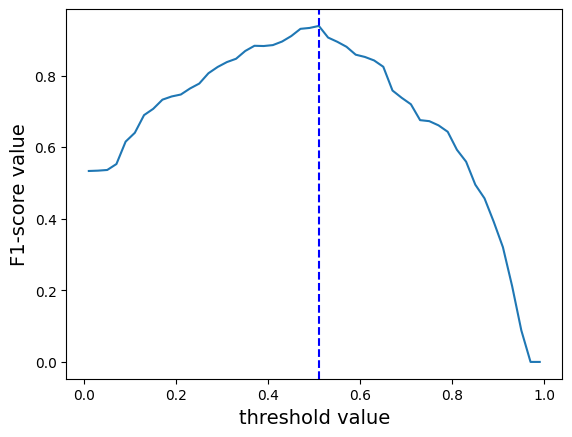

In [25]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# obtaining vector of f-score values
f_score_vct = np.array([f1_score(y_test, y_pred_proba > thresh) for thresh in thresh_range])

## finds the best value of the threshold
best_threshold_fscore = thresh_range[np.argmax(f_score_vct)]
print(f'max F1-score = {np.max(f_score_vct):.4f} at threshold = {best_threshold_fscore}')

plt.plot(thresh_range, f_score_vct)
plt.xlabel('threshold value', fontsize=14),
plt.ylabel('F1-score value', fontsize=14)
plt.axvline(best_threshold_fscore, ls='--', color='blue')
plt.show()

Now, try to do the same with MCC. Find the $\theta_{MCC}$, i.e., the $\theta_i$ parameter. Below, you need to do two subtasks:
1. Add a list comprehension for obtaining a list of Matthew's coefficients for the given threshold
2. Find the $\theta_{MCC}$ from `mcc_vct` and assign it to `best_threshold_mcc`

max MCC = 0.9028 at threshold = 0.51


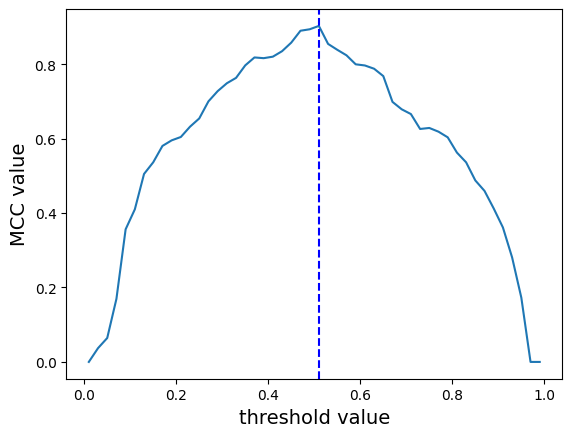

In [27]:
# add the list comprehension for obtaining a list of Matthew's coefficients for the given threshold
mcc_vct = np.array([ matthews_corrcoef(y_test, y_pred_proba > thresh) for thresh in thresh_range])

# find the best value of the threshold for MCC
best_threshold_mcc = thresh_range[np.argmax(mcc_vct)]
print(f'max MCC = {np.max(mcc_vct):.4f} at threshold = {best_threshold_mcc}')
best_MCC_index = np.argmax(mcc_vct)

plt.plot(thresh_range, mcc_vct)
plt.xlabel('threshold value', fontsize=14),
plt.ylabel('MCC value', fontsize=14)
plt.axvline(best_threshold_mcc, ls='--', color='blue')
plt.show()



In the cell below,  threshold the values using $\theta_{MCC}$ as:
$\text{if} \: y_p > \theta_{MCC} \: \text{then} \: y=1 \: \text{else} \: y=0$. Next, compute confusion matrix and accuracy for the best threshold value.

In [28]:
best_thresh_y = y_pred_proba > best_threshold_mcc # add code
# compute confusion matrix and accuracy (use the best threshold value)
print(f'Confusion matrix: \n{confusion_matrix( y_test, best_thresh_y, labels = [1, 0])}')
print(f'Accuracy: {my_accuracy(y_test, best_thresh_y)}')

Confusion matrix: 
[[145   7]
 [ 12 254]]
Accuracy: 0.9545454545454546


To get a broader view of the classifier and $\theta$ values, we display the ROC curve with AUC of the probabilistic predictions. But first, we extract FPR, TPR.

In [29]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
fpr.shape

(70,)

In [30]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label=f'ROC curve probabilistic (area = {auc(fpr, tpr):.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

NameError: name 'auc' is not defined

<Figure size 640x480 with 0 Axes>

# Regression problems
In this part, we will focus at error measures for regression problems. We will use the nonlinear dataset from the past lab.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error
from sklearn.dummy import DummyRegressor

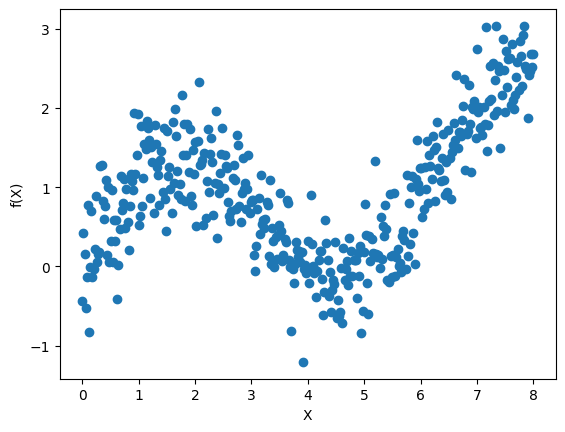

In [32]:
#@title Loading the data { display-mode: "form" }
np.random.seed(123)
n = 400
# creates a uniform sequence of n values between 0 and 8 (inclusive)
X = np.linspace(0, 8, n)
y = np.sin(X) + np.random.normal(0,0.4, n) + 0.2*X
y = y.reshape(-1,1)
X = X.reshape(-1,1)
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("f(X)")
plt.show()

First, we need to perform train-validation-test split. On the training set we train our models and on validation, we perform the predictions and select the best values of the hyperparameter. Finally, the test set is used to report the error measures.Train-validation-test split is not directly supported by sklearn, but we can perform it by train test split.

Your task is to split the data into *training* and *validation-test* set. Then, the validation-test set will be in the next step split into validation and test set. Use the data ratios specified above.

In [34]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1 - train_ratio  )# split the data into training and validation+test set

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio / (test_ratio + validation_ratio)) # split the test set into validation and test set

Below, print the shapes of `X_train`, `X_val`, and `X_test`, do they approximately correspond to the ratio specified above? If not, try to make corrections, so the data do correspond.  

In [35]:
print(f"train:\t\t{X_train.shape[0]/X.shape[0]}\nvalidation:\t{X_val.shape[0]/X.shape[0]}\ntest:\t\t{X_test.shape[0]/X.shape[0]}")

train:		0.6975
validation:	0.15
test:		0.1525


### Error measures for regression
To measure the error of regression model very comon metrics are MSE, RMSE and $R^{2}$. Both these measures are of course included in the `sklearn` library.

We can look at the similiarity between the MSE and $R^{2}$ at the training data. Below you see code to obtain MSE and $R^{2}$. Your task here is to compute by how many percent the MSE of the regression improved its fit
compared to MSE of the dummy mean model. Do you see any similarity to $R^{2}$. Print your justification how are MSE and $R^{2}$ related.

In [36]:
lr_model = LinearRegression().fit(X_train, y_train)
dummy_mean = DummyRegressor().fit(X_train, y_train)
y_fit_train = lr_model.predict(X_train)
y_dummy = dummy_mean.predict(X_train)

mse_dummy_train = mean_squared_error(y_train, y_dummy)
print(f"Dummy MSE: {mse_dummy_train:.2f}")

# compute MSE
mse_lin_reg_train = mean_squared_error(y_train, y_fit_train) # compute MSE
print(f"Linear model MSE: {mse_lin_reg_train:.2f}")

# obtain the r2_score for the linear model
print(f"R2 (linear model): {r2_score(y_train, y_fit_train):.4f}")

# compute by how many percent the MSE of linear regression improved its fit
# compared to MSE of the mean  - write your code instead of mse_proportion
print(f"R2 calculated from MSE {1 - mse_lin_reg_train/mse_dummy_train :.4f}")

Dummy MSE: 0.74
Linear model MSE: 0.62
R2 (linear model): 0.1595
R2 calculated from MSE 0.1595


To measure the error in the units of the predicted quantity, we can take a square root of the MSE and get RMSE. Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) of sklearn's `mean_squared_error` how to calculate RMSE.

In [49]:
import sklearn.metrics as jj
RMSE = jj.root_mean_squared_error(y_train, y_fit_train)
print(f"Train RMSE:{RMSE :.4f}")

Train RMSE:0.7891


### Percentage error
In regression task, you can use percentage errors expressing the error measure in relative nubmers (without units).
*Mean absolute percentage error* has the following equation:
$MAPE = \frac{1}{n}\sum_{i=1}^{n}\Big|\frac{y-\hat{y}}{y}\Big|100\%$.
When $y$ is close to zero, MAPE will reach very high values. Therefore, for such applications we recommend alternative measures such as [scaled errors](https://otexts.com/fpp3/accuracy.html#scaled-errors). Below, calculate MAPE for linear regression on training data.

In [51]:
mape_dummy_train = mean_absolute_percentage_error(y_train, y_dummy)
print(f"Dummy MAPE : {100*mse_dummy_train:.2f}%")

# compute MAPE for linear model
mape_lin_reg_train =mean_absolute_percentage_error(y_train, y_fit_train) # MAPE on train data
print(f"Linear model MAPE : {100*mape_lin_reg_train:.2f}%")

Dummy MAPE : 74.09%
Linear model MAPE : 1010.03%


Below, you can print MAPE for the validation and test set. Is it much lower than the training set?

In [52]:
mape_lin_reg_valid = mean_absolute_percentage_error(y_val, lr_model.predict(X_val))
print(f"Linear model validation MAPE : {100*mape_lin_reg_valid:.2f}%")

# compute MAPE for linear model
mape_lin_reg_test =mean_absolute_percentage_error(y_test, lr_model.predict(X_test)) # MAPE on train data
print(f"Linear model MAPE : {100*mape_lin_reg_test:.2f}%")

Linear model validation MAPE : 280.71%
Linear model MAPE : 353.70%


# K-fold crossvalidation

As you have seen, the train vs test error largely depends on the hyperparameters (degree of polynomial, k, depth of a decision tree, ...). Here, we will apply crossvalidation to find the best values of hyperparameters while avoiding overfitting. To perform this, we use the iris dataset.

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

Here, we will implement cross-validation. Note, that we use as scoring the negative MSE, as the model evaluation is built in a way that
**higher return values are better than lower return values**. Therefore, all the errors will be negative so we take their absolute value. Finally, we average all the returned values.

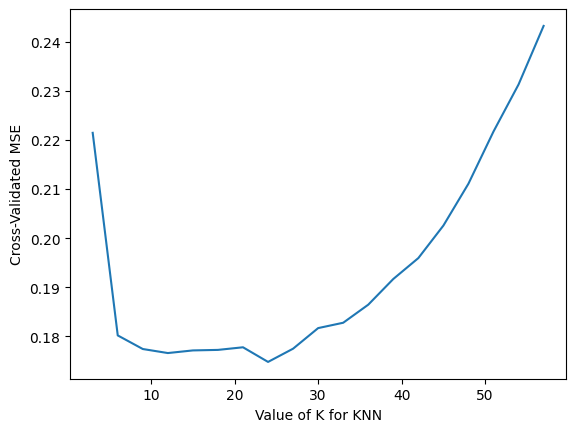

In [54]:
k_range = range(3, 60, 3)
k_scores = []
for k in k_range:
    # creates a knn regression
    knn = KNeighborsRegressor(n_neighbors=k)
    # performs the crossvalidation and obtain the absolute value of the error
    loss = abs(cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    # take an average of each fold
    k_scores.append(loss.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

After inspecting the plot, try to print the $K$ corresponding to the lowest cross-validated MSE.

---
**Bonus task for 1 point**

---

Perform a similar cross-validation with 5 folds using a KNN **classifier** on train-test set splitted **titanic** dataset. Do nto forget   Aim for the $k$ in KNN that has the lowest test error. To see the available metrics, check this [sklearn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html). Try to use a complex metric. Finally, print the $k$ corresponding to the best model as well as the training and test error of the score.

**Nonmandatory task**:

Try to complete the cross-validation code below.

In [ ]:
import random
import math

nobs = 150
nfold = 5

# function to shuffle the indicies of folds
def cv_fold_indicies(n_obs, n_fold):
  # get a sequence of fold indicies
  fold_indicies = np.repeat(np.arange(0,n_fold), math.ceil(n_obs/n_fold)) [:n_obs]
  # shuffle the fold indicies
  shuffled_fold_indicies = np.random.choice(fold_indicies, size = n_obs, replace = False)
  return shuffled_fold_indicies

def my_cv(X, y, n_fold, model, metric, **kwargs):
  # gets the folds
  cv_indicies = cv_fold_indicies(len(y), n_fold)
  # creates the result matrix filled with zeroes
  result_matrix = np.zeros((n_fold,2))
  for i in range(n_fold):
    # obtains the train indicies as the indicies that are not i
    train_indices = cv_indicies != i
    # obtain the test cv_indicies
    test_indices = # similar to the one above...
    model.fit(X[train_indices,:], y[train_indices])
    y_train = model.predict(X[train_indices,:])
    # get predictions on the test fold
    y_test = # your code here
    train_metric = metric(y[train_indices], y_train)
    # calculate value of test metric
    test_metric = # your code here
    result_matrix[i,] = (train_metric, test_metric)
  return np.mean(result_matrix, axis = 0)
